# A Forest Fire Model Implementation

This implementation uses spatial vectorization by mean of numpy. 

World model is a square grid in which every cell could represent:
* ground;
* fire;
* tree.

The model evolves according to these simple rules:
* a fire cell evolves to a ground cell;
* a tree evolves to a fire cell if it has at least a fire neighbour (Von Neumann neighborhood);
* a tree remains a tree if it has no fire neighbours;
* ground remains ground.

Outline of the notebook:
* [Simulation and plotting](#simulation)
* [Animation](#animation)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%config InlineBackend.figure_format = 'retina'
from IPython import display

Cells types are defined below.

In [18]:
FIRE = 5
TREE = 1
GROUND = 0

## <a id='simulation'></a>Simulation and plotting
The grid id determined by its size `size`, while `density` is the density of trees on the grid.
In this simulation the left column of the grid is on fire. Depending on the value of density the fire reaches the right column or not.

In [20]:
size = 1024
density = 0.60

In [21]:
#grid definition
grid = np.zeros((size+2, size+2), dtype=int)
grid[np.random.uniform(0., 1., (size+2,size+2))<density] = TREE

#the first column of the grif is on fire!
grid[:,1] = FIRE

#boundary conditions
grid[:,0] = GROUND
grid[:,size+1] = GROUND
grid[0,:] = GROUND
grid[size+1,:] = GROUND

#auxiliary array
will_fire = np.zeros(grid.shape, dtype=np.bool8)

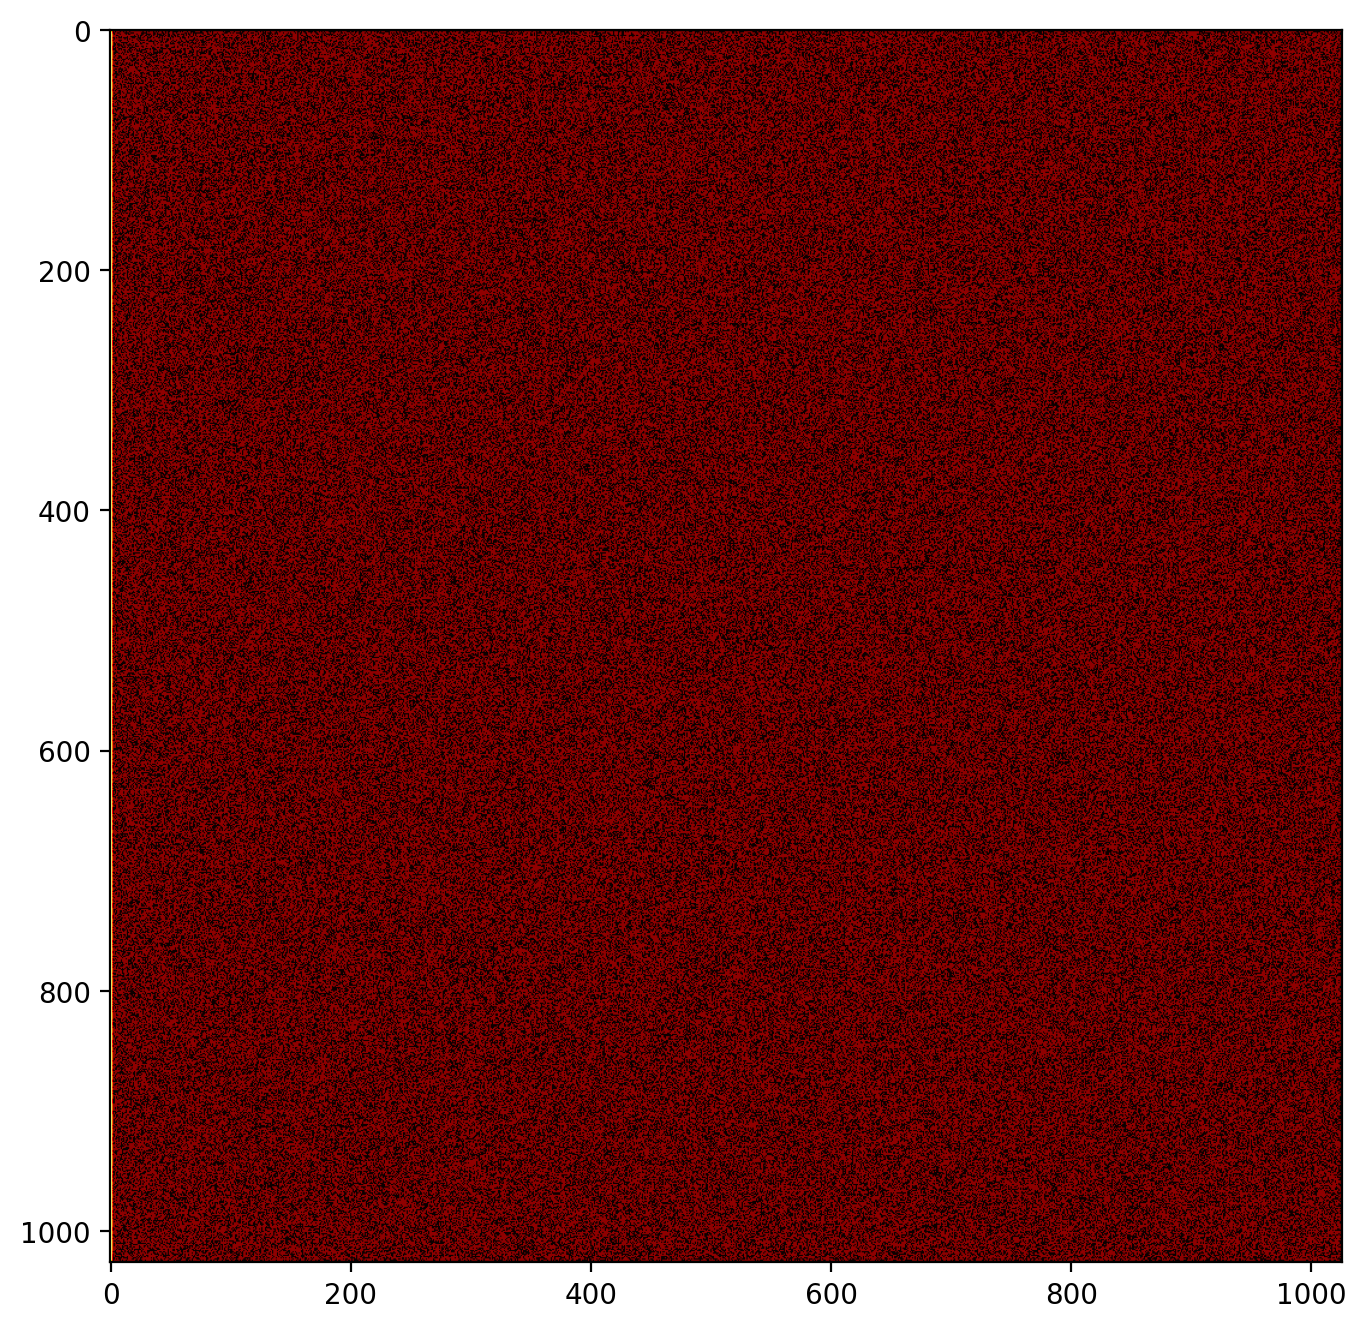

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(grid, cmap="hot", vmin=GROUND, vmax=FIRE)
plt.show()

In [23]:
n_iteration=1000
for _ in range(n_iteration):
    will_fire[1:-1,1:-1] = ((grid[ :-2,1:-1]==FIRE) | (grid[1:-1, :-2]==FIRE)
     | (grid[1:-1,2:]==FIRE) | (grid[2:  ,1:-1]==FIRE)) & (grid[1:-1,1:-1]==TREE)
    grid[grid==FIRE]=GROUND
    grid[will_fire]=FIRE
    grid[:,0] = GROUND
    grid[:,size+1] = GROUND
    grid[0,:] = GROUND
    grid[size+1,:] = GROUND

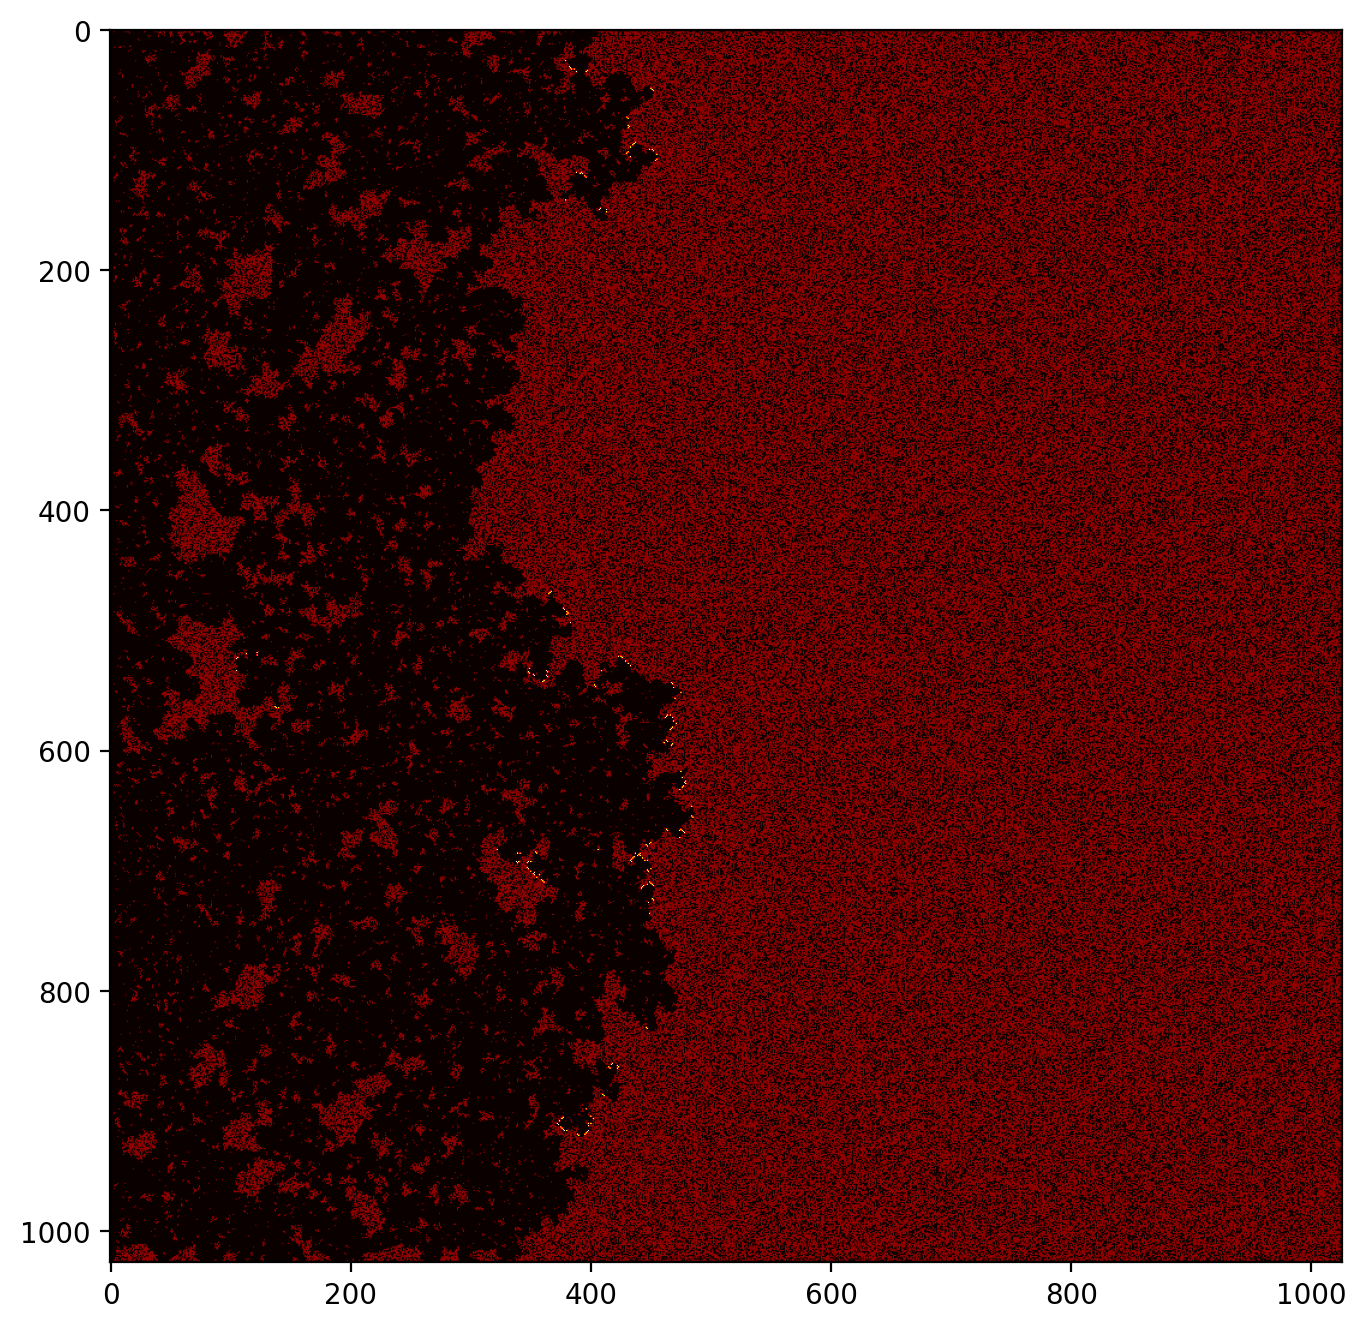

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(grid, cmap="hot", vmin=GROUND, vmax=FIRE)
plt.show()

##  <a id='animation'></a>Animation

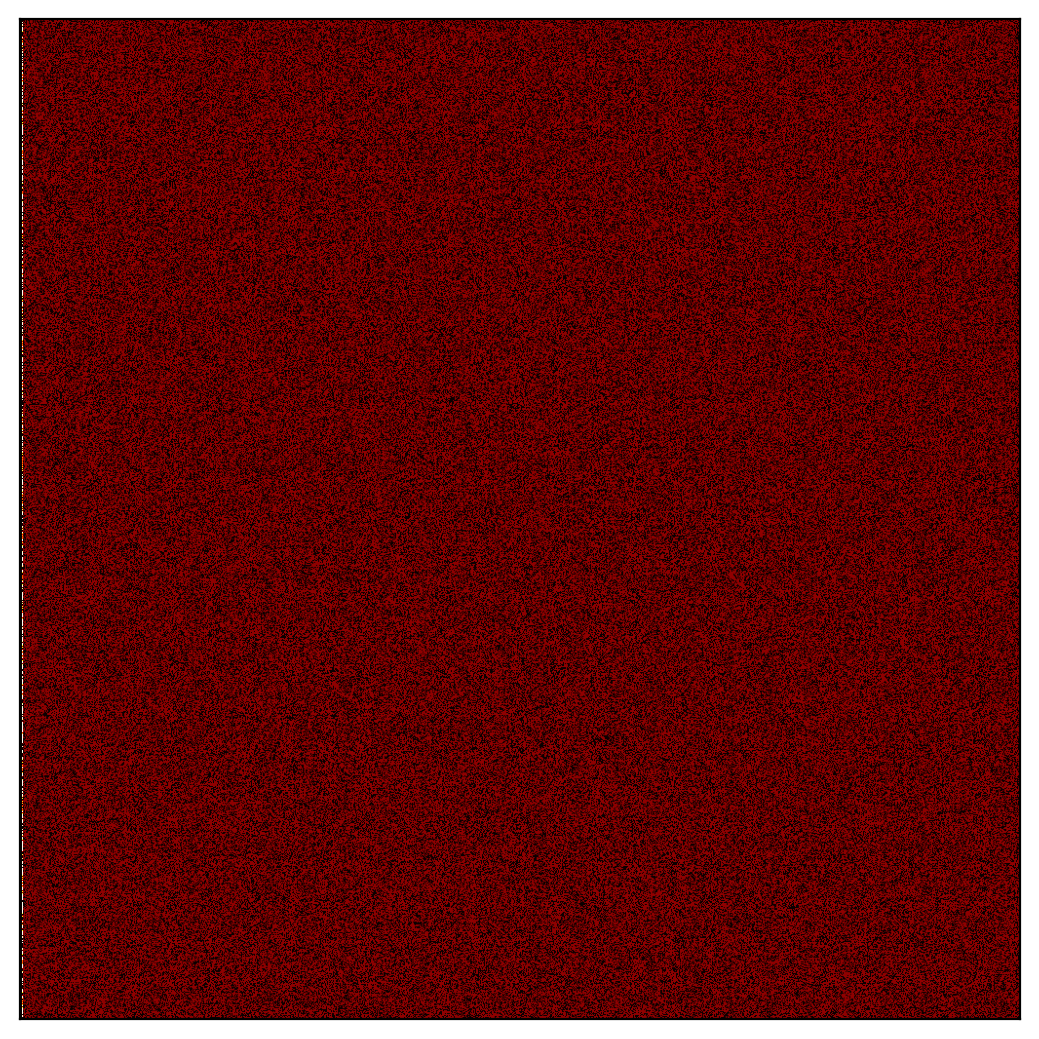

In [11]:
size = 1024
density = 0.60

grid = np.zeros((size+2, size+2), dtype=int)
grid[np.random.uniform(0., 1., (size+2,size+2))<density] = TREE
grid[:,1] = FIRE
grid[:,0] = GROUND
grid[:,size+1] = GROUND
grid[0,:] = GROUND
grid[size+1,:] = GROUND
will_fire = np.zeros(grid.shape, dtype=np.bool8)

fig,ax = plt.subplots(figsize=(5,5))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
image = ax.imshow(grid, cmap="hot", vmin=GROUND, vmax=FIRE)
plt.xticks([]), plt.yticks([])

def update(frame):
    global grid
    will_fire[1:-1,1:-1] = ((grid[ :-2,1:-1]==FIRE) | (grid[1:-1, :-2]==FIRE)
     | (grid[1:-1,2:]==FIRE) | (grid[2:  ,1:-1]==FIRE)) & (grid[1:-1,1:-1]==TREE)
    grid[grid==FIRE]=GROUND
    grid[will_fire]=FIRE
    grid[:,0] = GROUND
    grid[:,size+1] = GROUND
    grid[0,:] = GROUND
    grid[size+1,:] = GROUND
    image.set_data(grid)
    return image,

animation = FuncAnimation(fig, update, frames=1000, interval=20)

<div class='alert alert-block alert-warning'>
To execute the following cell, ffmeg is necessary, please see <a href="https://ffmpeg.org/download.html">official site</a> for installation.
<div>

In [25]:
video = animation.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()